In [2]:
import pickle


In [3]:
with open('MNB.pkl', 'rb') as file:
    clf = pickle.load(file)

with open('Vectorizer.pkl', 'rb') as file:
    vc = pickle.load(file)

In [75]:
email_text = ["""Hi [Name],

I hope you're doing well! I wanted to follow up on our recent discussion regarding the [Project Name]. We've made significant progress, and I’ve attached the latest version of the report for your review.

Could you take a look and let me know your thoughts? If everything looks good, we can move forward with the next steps as planned.

Looking forward to hearing from you.

Best regards,
[Your Name]"""]
X_new = vc.transform(email_text)
prediction = clf.predict(X_new)
probabilities = clf.predict_proba(X_new)
for text, prob in zip(email_text, probabilities):
    if prediction == 1:
        print(f"""Spam Probability: {prob[1]}
                    This email is spam""")
    else: 
        print(f"""Non-Spam Probability: {prob[0]}
                    This email is NOT spam""")



Non-Spam Probability: 0.9999996040489452
                    This email is NOT spam


         Word  Spam Contribution  Ham Contribution  Email Count
1854     name           4.298679          2.846480            3
1530   latest           2.706575          0.126510            1
1505     know           1.830919          6.072490            1
3143     take           1.353288          3.637169            1
1890     next           1.114472          1.296730            1
1253       hi           1.034867          3.415776            1
1020   follow           0.796052          0.158138            1
1148     good           0.796052          6.009235            1
1041  forward           0.796052          0.695806            2
266      best           0.716446          0.917199            1
1607     look           0.557236          1.644633            1
592     could           0.557236          1.549750            1
3730     well           0.398026          2.909735            1
1558      let           0.398026          2.213929            1
2327   recent           0.398026        

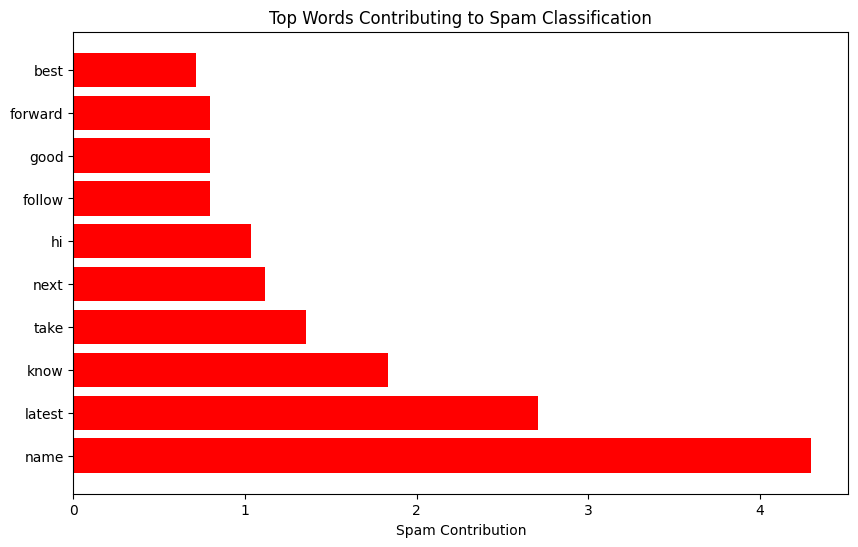

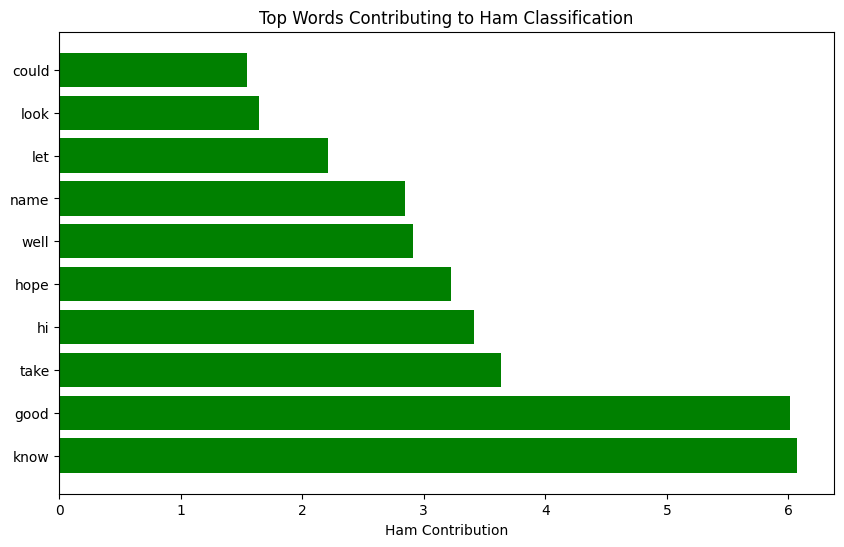

In [79]:
import pandas as pd
import numpy as np


# Create a DataFrame to explain word contributions
words = vc.get_feature_names_out()
email_df = pd.DataFrame({
    "Word": words,
    "Spam Contribution": clf.feature_log_prob_[1],
    "Ham Contribution": clf.feature_log_prob_[0],
    "Email Count" : X_new.toarray().flatten()
})

email_df = email_df[email_df['Email Count'] > 0]

email_df['Spam Contribution'] = email_df['Email Count'] * np.exp(email_df['Spam Contribution']) * 1000
email_df['Ham Contribution'] = email_df['Email Count'] * np.exp(email_df['Ham Contribution']) * 1000

# Sort the DataFrame to show the most important words first (contribution to spam)
word_contrib_df = email_df.sort_values(by='Spam Contribution', ascending=False)
non_spam = email_df.sort_values(by='Ham Contribution', ascending=False)
print(word_contrib_df)

import matplotlib.pyplot as plt

# Plot the top words contributing to spam
top_words = word_contrib_df.head(10)
top_non_spam = non_spam.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_words['Word'], top_words['Spam Contribution'], color='red')
plt.xlabel('Spam Contribution')
plt.title('Top Words Contributing to Spam Classification')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_non_spam['Word'], top_non_spam['Ham Contribution'], color='green')
plt.xlabel('Ham Contribution')
plt.title('Top Words Contributing to Ham Classification')
plt.show()